Implementing the exercises from Han van der Maas' book https://santafeinstitute.github.io/ComplexPsych/ in Python.
Chapter 2.  Chaos and unpredictability

Anne Urai, Leiden University, 2025

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


<Axes: >

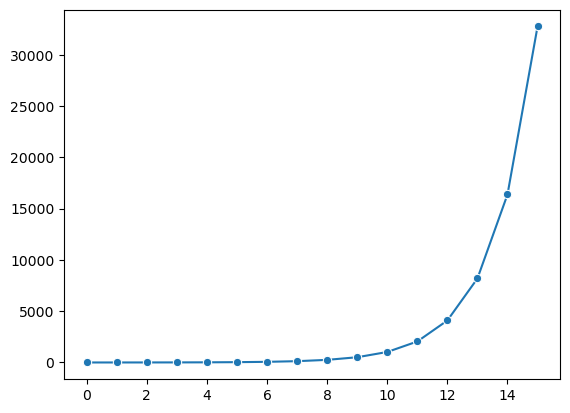

In [2]:
#%% figure 2.1
r = 2 # growth rate
x = ([1]) # initialize the list
for i in range(15):
    x.append(r*x[i])
sns.lineplot(data=x, marker='o')

<Axes: >

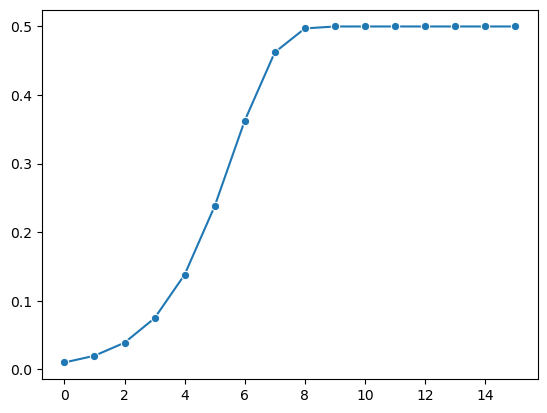

In [3]:
# %% figure 2.2
r = 2 # growth rate
x = ([0.01]) # initialize the list
for i in range(15):
    x.append(r*x[i] * (1 - x[i])) # equation 2.2
sns.lineplot(data=x, marker='o')

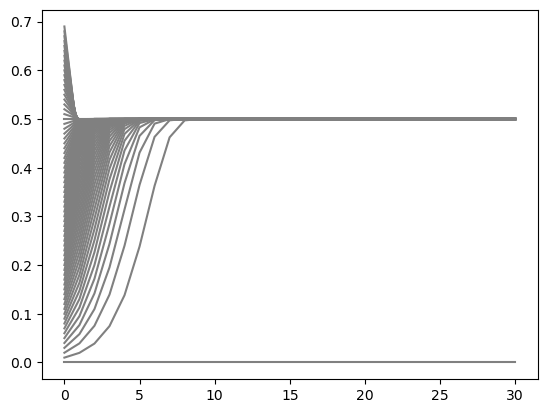

In [5]:
# %% figure 2.3
r = 2 # growth rate

for init in np.arange(0, 0.7, 0.01):
    x = ([init]) # initialize the list
    for i in range(30):
        x.append(r*x[i] * (1 - x[i])) # equation 2.2
    sns.lineplot(data=x, color='grey')

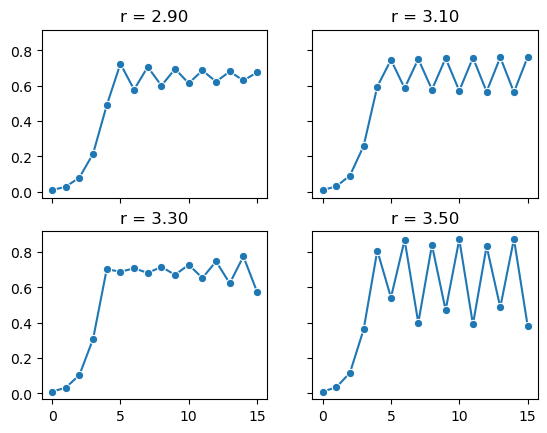

In [24]:
# figure 2.4
fig, axs = plt.subplots(2, 2, sharex=True, sharey=True)
axs = axs.flatten()
for ix, r in enumerate([2.9, 3.1, 3.3, 3.5]): # growth rate
    x = ([0.01]) # initialize the list
    for i in range(15):
        x.append(r*x[i] * (1 - x[i])) # equation 2.2
    sns.lineplot(data=x, marker='o', ax=axs[ix])
    axs[ix].set_title("r = %.2f"%r)

Text(0.5, 1.0, 'r = 4')

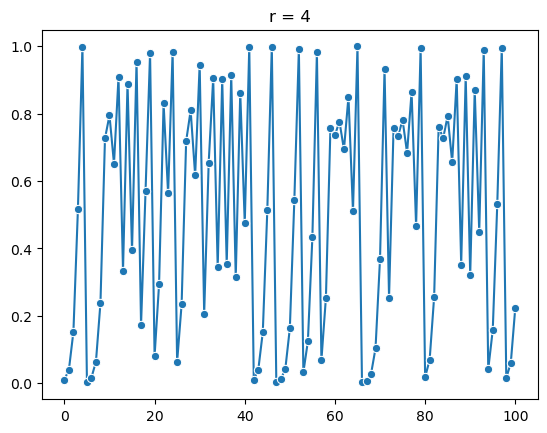

In [28]:
# %% figure 2.5
r = 4 # growth rate
x = ([0.01]) # initialize the list
for i in range(100):
    x.append(r*x[i] * (1 - x[i])) # equation 2.2
sns.lineplot(data=x, marker='o')
plt.title('r = 4')

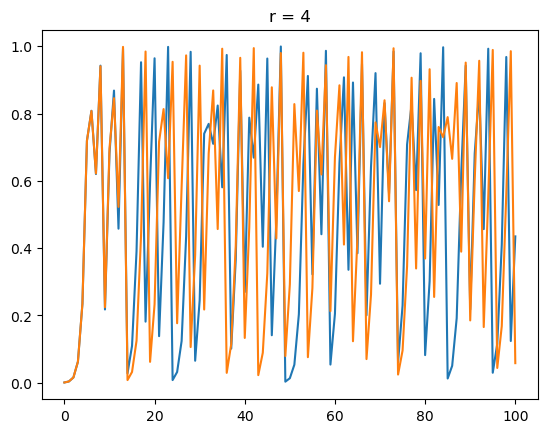

In [ ]:
# %% figure 2.6
r = 4 # growth rate
for init in [0.001, 0.001001]:
    x = ([init]) # initialize the list
    for i in range(100):
        x.append(r*x[i] * (1 - x[i])) # equation 2.2
    sns.lineplot(data=x)
    plt.title('r = 4')

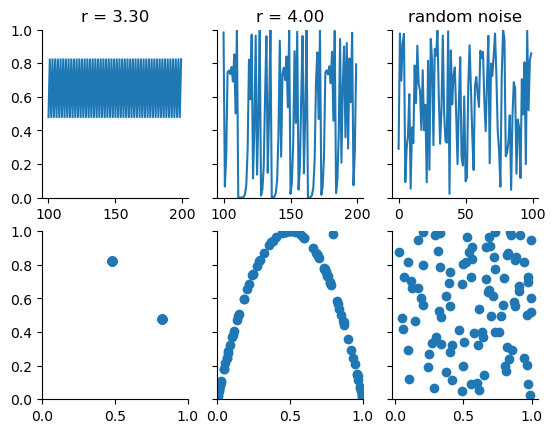

In [79]:
# figure 2.7

fig, axs = plt.subplots(2, 3, sharex=False, sharey=True)
# the two growth functions
for ix, r in enumerate([3.3, 4]):
    x = ([0.001]) # initialize the list
    for i in range(200):
        x.append(r*x[i] * (1 - x[i])) # equation 2.2
    x = x[-100:] # keep only the end
    ax=axs[0,ix].plot(range(100, 200), x, '-')
    axs[0,ix].set(title = "r = %.2f"%r, ylim=[0,1])

    axs[1,ix].plot(x, x[1:] + x[:1], 'o')
    axs[1,ix].set(xlim=[0,1], ylim=[0,1])

# and the random noise
x = list(np.random.uniform(0, 1, len(x)))
axs[0,2].plot(x)
axs[0,2].set(title='random noise')
axs[1,2].plot(x, x[1:] + x[:1], 'o')
sns.despine()

/var/folders/ly/drwv1q0j4t977rvf2rqyvvq8gsq3lc/T/ipykernel_3630/1037915248.py:5: RuntimeWarning: overflow encountered in scalar multiply
  x.append(r*x[i] * (1 - x[i])) # equation 2.2


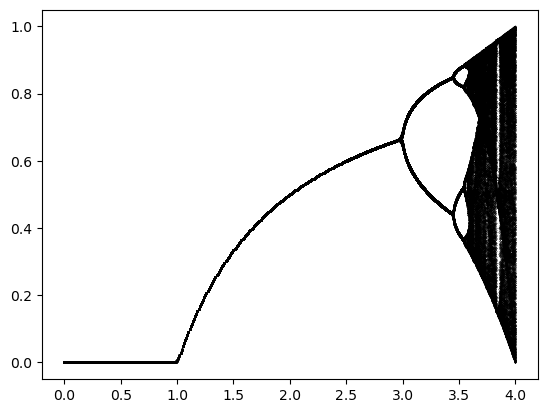

In [110]:
# figure 2.8 - the bifurcation diagram
def growth_function(r, x, n, m):
    x = ([x]) # initialize the list
    for i in range(n):
        x.append(r*x[i] * (1 - x[i])) # equation 2.2
    return x[-m:] # keep only the end
    
for r in np.concatenate((np.arange(0, 5, 0.01), np.arange(2.5, 4, 0.001)), axis=0):
    equilibria = growth_function(r, 0.1, 200, 100)
    plt.plot([r]*100, equilibria, '.', ms=0.5, color='black')